# Adaline

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(func, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()

    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, func(line_x))
    plt.show()

## Praktikum

### a) Fungsi Step Bipolar

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def binstep(y, th=0):
  if y >= th:
    return 1
  return -1

### b) Fungsi *Training* Adaline

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
import sys

def adaline_fit(x, t, alpha=0.1, max_err=0.1, max_epoch=-1, verbose=False, draw=False):
  w = np.random.uniform(0, 1, len(x[0]) + 1)
  b = np.ones((len(x), 1))   
  x = np.hstack((b, x))
  stop = False
  epoch = 0

  while not stop and (max_epoch == -1 or epoch < max_epoch):
    epoch += 1
    max_ch = -sys.maxsize

    if verbose:
      print('\nEpoch', epoch)

    for r, row in enumerate(x):
      y = np.dot(row, w)
      for i in range(len(row)):
        w_new = w[i] + alpha * (t[r] - y) * row[i]
        max_ch = max(abs(w[i] - w_new), max_ch)
        w[i] = w_new

      if verbose:
        print('Bobot:', w)

      if draw:
        plot(line(w), x, t)

    stop = max_ch < max_err
  return w, epoch

### c) Fungsi *Testing* Adaline

Tulis kode ke dalam *cell* di bawah ini:

In [4]:
def adaline_predict(X, w):

  Y = []

  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = binstep(y_in)
    
    Y.append(y)

  return Y

### d) Fungsi Hitung Akurasi

Tulis kode ke dalam *cell* di bawah ini:

In [5]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

  return sum(s) / len(a)

### e) Logika AND

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [0.26968479 0.93896536 0.19251798]


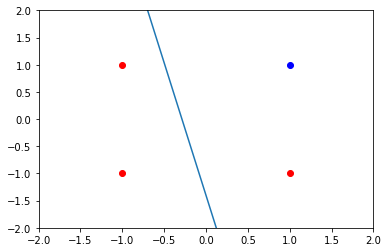

Bobot: [0.06807158 0.73735214 0.3941312 ]


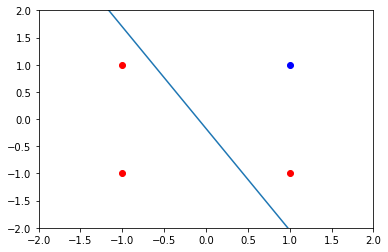

Bobot: [-0.00441349  0.8098372   0.32164613]


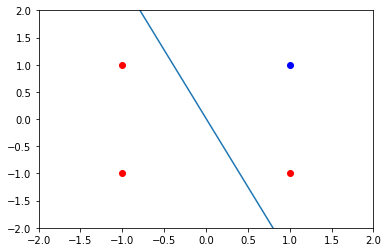

Bobot: [0.0091762  0.79624752 0.30805645]


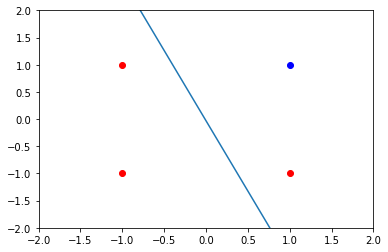


Epoch 2
Bobot: [-0.00217182  0.78489951  0.29670843]


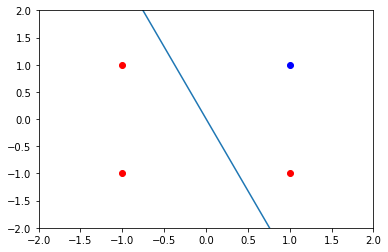

Bobot: [-0.15077375  0.63629758  0.44531036]


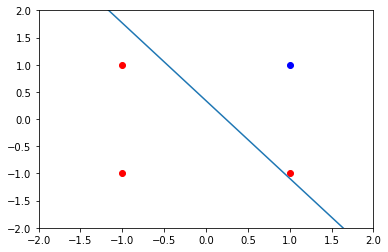

Bobot: [-0.21659765  0.70212148  0.37948646]


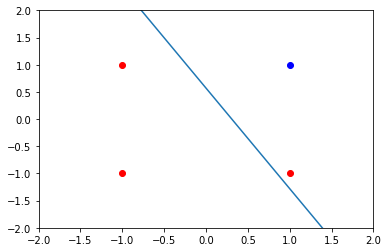

Bobot: [-0.18677709  0.67230092  0.3496659 ]


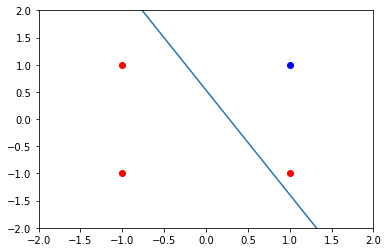


Epoch 3
Bobot: [-0.17029606  0.68878195  0.36614692]


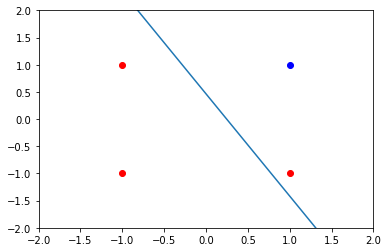

Bobot: [-0.28552996  0.57354806  0.48138082]


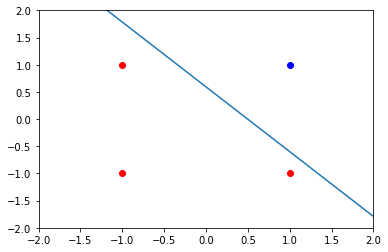

Bobot: [-0.34776024  0.63577834  0.41915054]


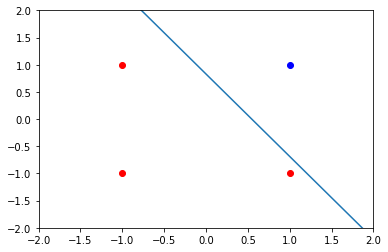

Bobot: [-0.30749133  0.59550942  0.37888163]


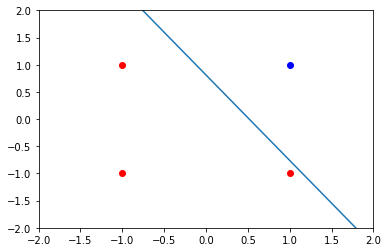


Epoch 4
Bobot: [-0.2741813   0.62881945  0.41219166]


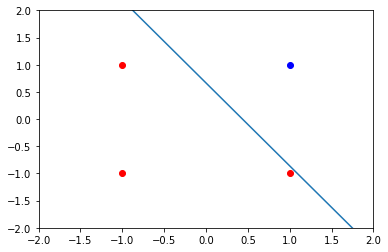

Bobot: [-0.36842595  0.5345748   0.50643631]


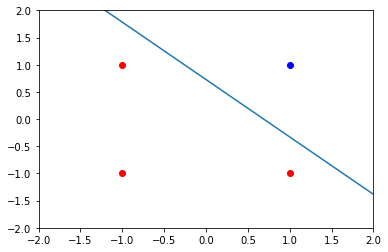

Bobot: [-0.42876951  0.59491836  0.44609275]


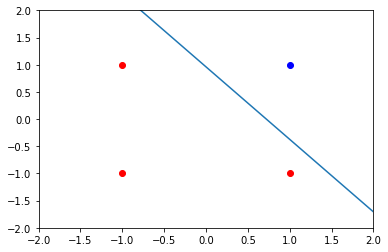

Bobot: [-0.38179144  0.5479403   0.39911469]


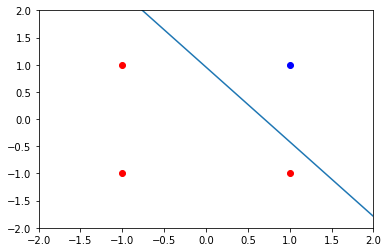

Output: [1, -1, -1, -1]
Epoch: 4
Target: (1, -1, -1, -1)
Accuracy: 1.0


In [8]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, -1, -1, -1
w, epoch = adaline_fit(train, target, alpha=0.1, max_err=0.1, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### f) Logika OR

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [-0.06086994  0.82640064  0.66138753]


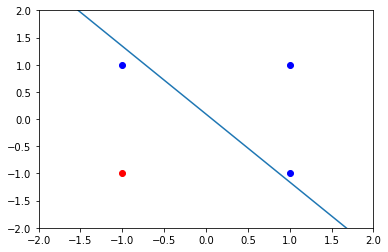

Bobot: [0.02871575 0.91598632 0.57180185]


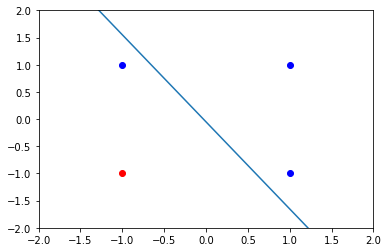

Bobot: [0.16026262 0.78443945 0.70334872]


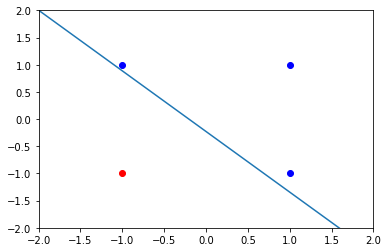

Bobot: [0.19301517 0.75168689 0.67059616]


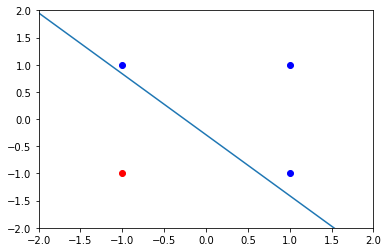


Epoch 2
Bobot: [0.13148535 0.69015707 0.60906634]


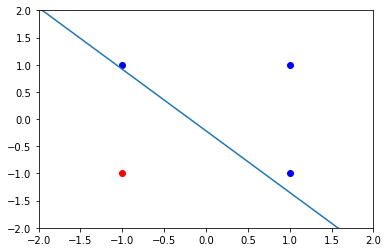

Bobot: [0.21022774 0.76889946 0.53032395]


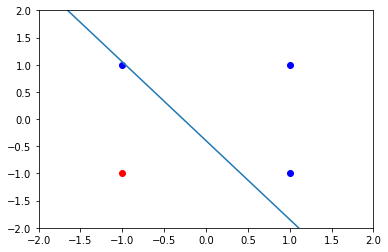

Bobot: [0.31306252 0.66606469 0.63315873]


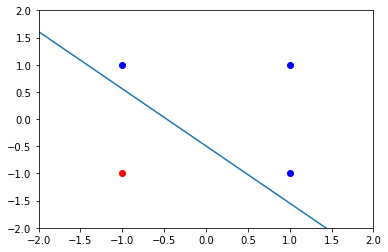

Bobot: [0.31167861 0.6674486  0.63454264]


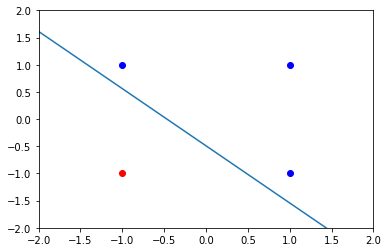


Epoch 3
Bobot: [0.25031163 0.60608161 0.57317565]


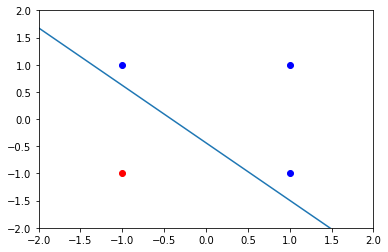

Bobot: [0.32198987 0.67775985 0.50149741]


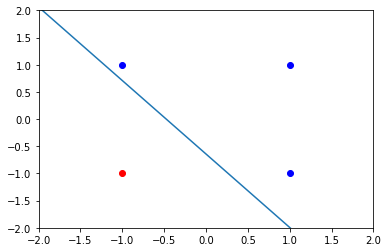

Bobot: [0.40741712 0.5923326  0.58692467]


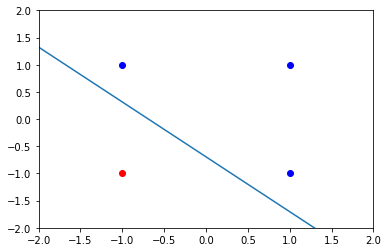

Bobot: [0.38460114 0.61514858 0.60974065]


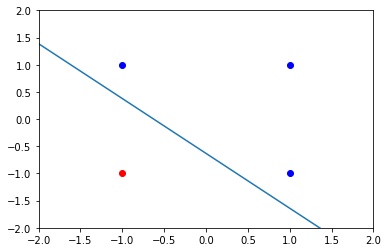

Output: [1, 1, 1, -1]
Epoch: 3
Target: (1, 1, 1, -1)
Accuracy: 1.0


In [9]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = 1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### g) Logika AND NOT

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [ 0.62184437 -0.17079242  0.57253062]


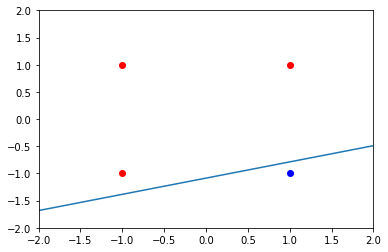

Bobot: [ 0.73399223 -0.05864455  0.46038275]


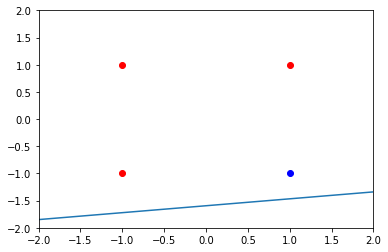

Bobot: [0.50869028 0.1666574  0.2350808 ]


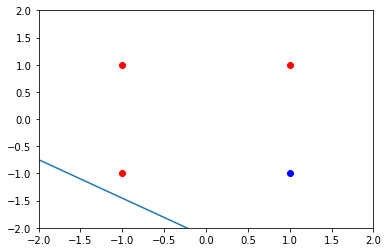

Bobot: [0.39799507 0.27735261 0.34577601]


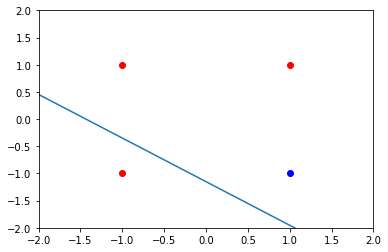


Epoch 2
Bobot: [0.1958827  0.07524024 0.14366364]


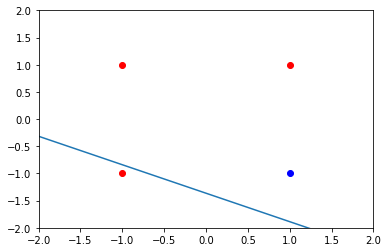

Bobot: [0.28313677 0.16249431 0.05640957]


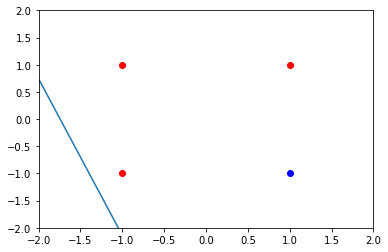

Bobot: [ 0.16543157  0.28019951 -0.06129563]


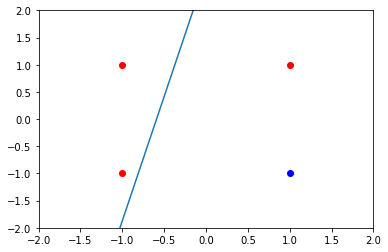

Bobot: [0.0707788  0.37485228 0.03335713]


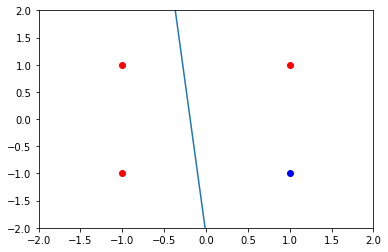


Epoch 3
Bobot: [-0.07712002  0.22695346 -0.11454169]


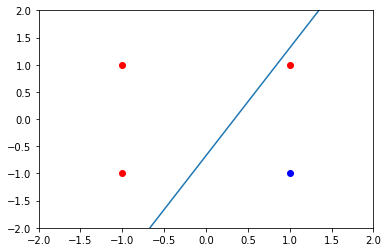

Bobot: [-0.00355753  0.30051595 -0.18810417]


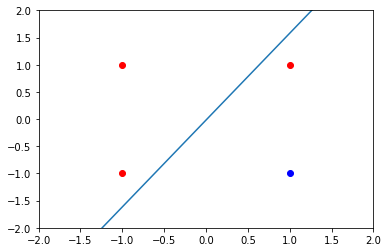

Bobot: [-0.05433977  0.35129818 -0.23888641]


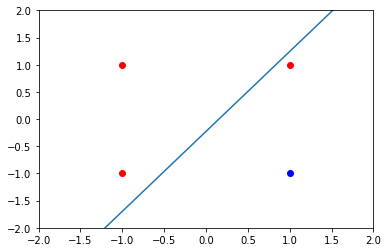

Bobot: [-0.13766461  0.43462303 -0.15556156]


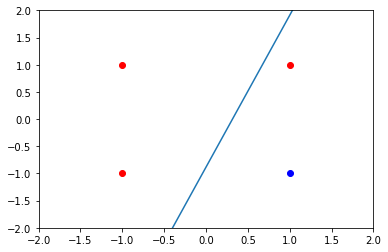


Epoch 4
Bobot: [-0.2518043   0.32048334 -0.26970125]


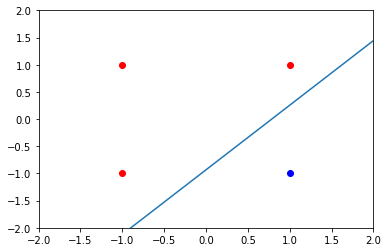

Bobot: [-0.18564233  0.38664531 -0.33586322]


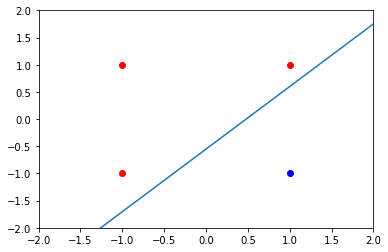

Bobot: [-0.19482724  0.39583023 -0.34504813]


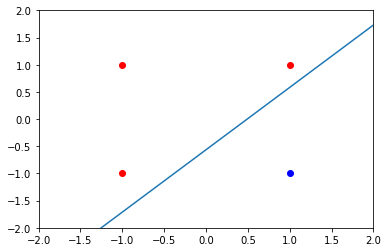

Bobot: [-0.27026631  0.47126929 -0.26960907]


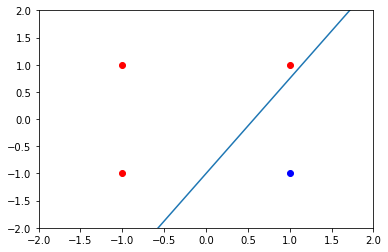


Epoch 5
Bobot: [-0.3634057   0.3781299  -0.36274846]


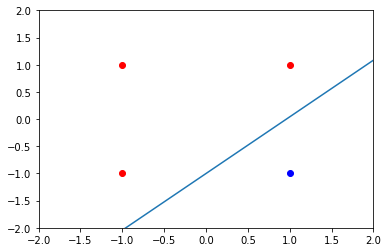

Bobot: [-0.30115297  0.44038264 -0.42500119]


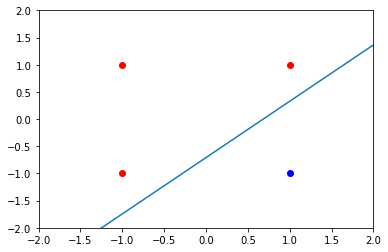

Bobot: [-0.28449929  0.42372896 -0.40834751]


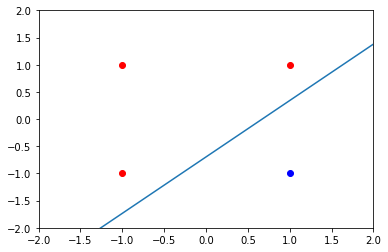

Bobot: [-0.35451121  0.49374088 -0.33833559]


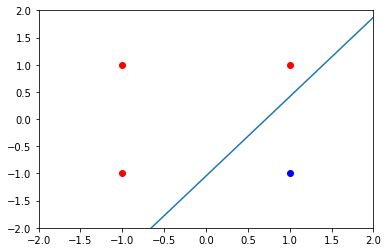

Output: [-1, 1, -1, -1]
Epoch: 5
Target: (-1, 1, -1, -1)
Accuracy: 1.0


In [10]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, -1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### h) Logika XOR

Tulis kode ke dalam *cell* di bawah ini:


Epoch 1
Bobot: [-0.07462793  0.01163658  0.40384057]


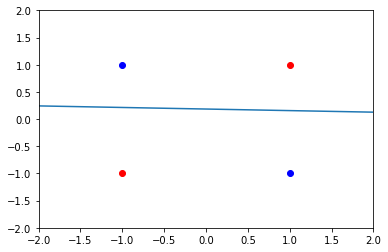

Bobot: [0.07205526 0.15831977 0.25715738]


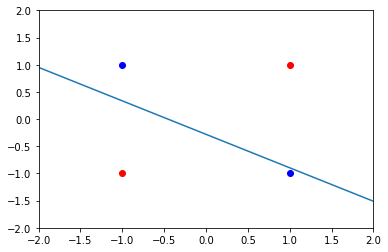

Bobot: [0.15496597 0.07540906 0.34006809]


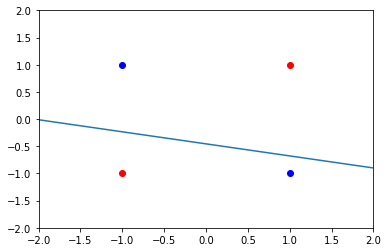

Bobot: [0.08101709 0.14935794 0.41401697]


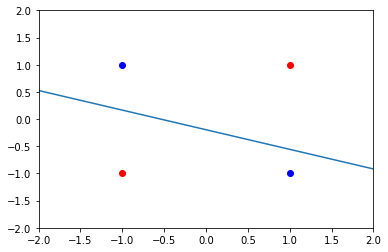


Epoch 2
Bobot: [-0.08342211 -0.01508126  0.24957777]


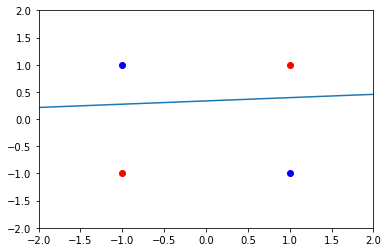

Bobot: [0.05138601 0.11972685 0.11476966]


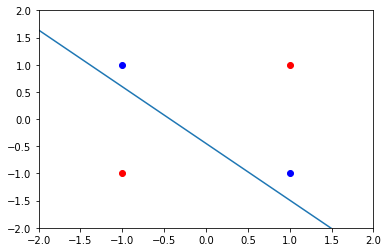

Bobot: [0.14674312 0.02436974 0.21012678]


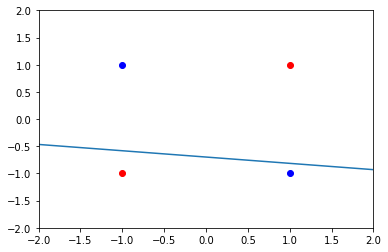

Bobot: [0.05551846 0.1155944  0.30135144]


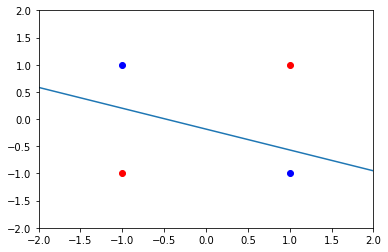


Epoch 3
Bobot: [-0.09172797 -0.03165203  0.15410501]


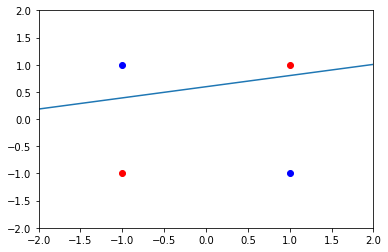

Bobot: [0.03602053 0.09609647 0.02635651]


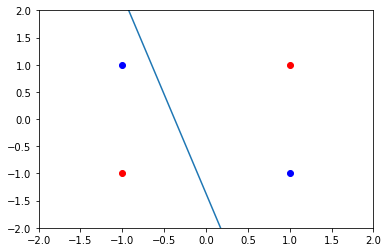

Bobot: [ 0.13939248 -0.00727548  0.12972845]


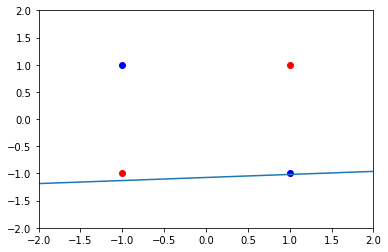

Bobot: [0.03769853 0.09441848 0.2314224 ]


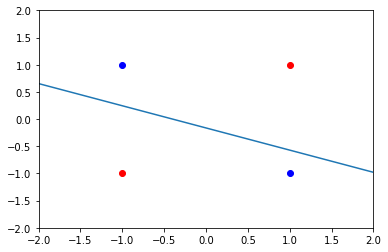


Epoch 4
Bobot: [-0.09865541 -0.04193547  0.09506846]


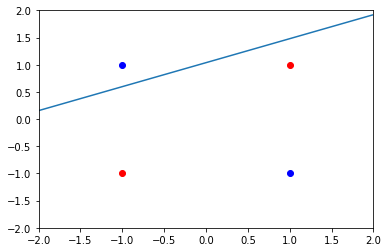

Bobot: [ 0.02491052  0.08163047 -0.02849747]


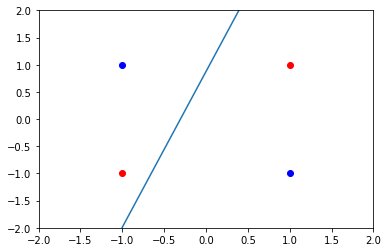

Bobot: [ 0.13343226 -0.02689127  0.08002427]


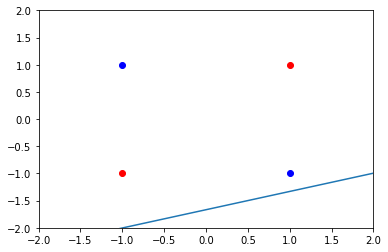

Bobot: [0.02540234 0.08113865 0.1880542 ]


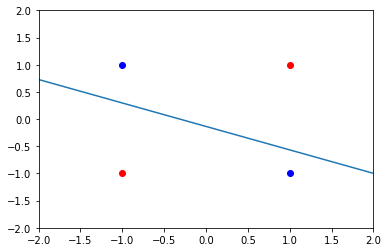


Epoch 5
Bobot: [-0.10405718 -0.04832087  0.05859468]


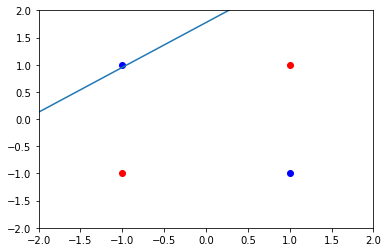

Bobot: [ 0.01704009  0.07277641 -0.0625026 ]


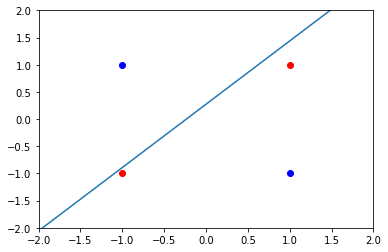

Bobot: [ 0.12886398 -0.03904748  0.0493213 ]


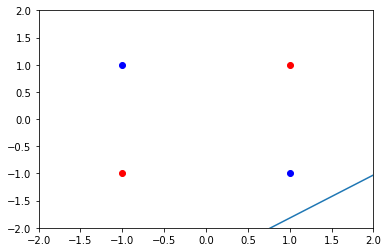

Bobot: [0.01700496 0.07281153 0.16118031]


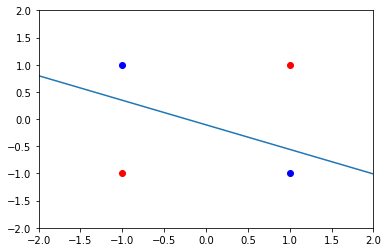


Epoch 6
Bobot: [-0.10809472 -0.05228815  0.03608063]


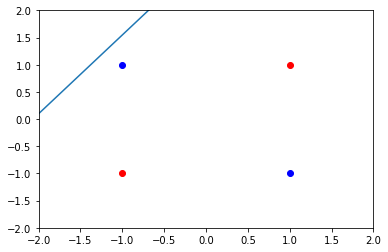

Bobot: [ 0.01155163  0.0673582  -0.08356572]


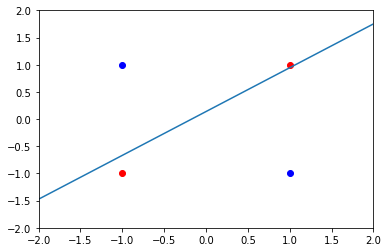

Bobot: [ 0.12548886 -0.04657903  0.03037151]


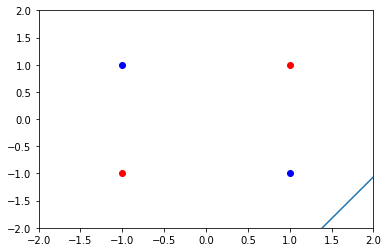

Bobot: [0.01131922 0.06759061 0.14454115]


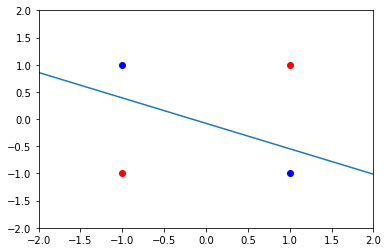


Epoch 7
Bobot: [-0.11102587 -0.05475449  0.02219605]


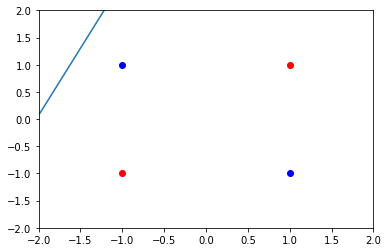

Bobot: [ 0.00777177  0.06404315 -0.09660159]


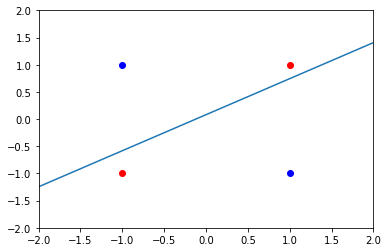

Bobot: [ 0.12305906 -0.05124414  0.01868571]


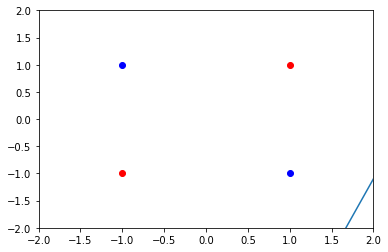

Bobot: [0.00749731 0.06431761 0.13424746]


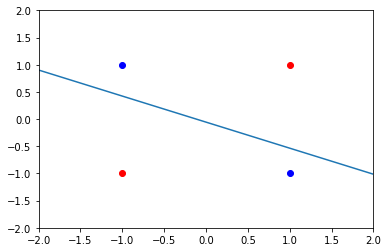


Epoch 8
Bobot: [-0.11310892 -0.05628863  0.01364122]


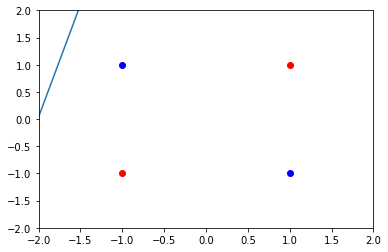

Bobot: [ 0.00519495  0.06201525 -0.10466266]


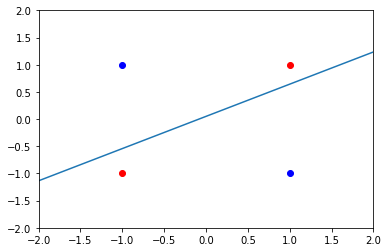

Bobot: [ 0.12134325 -0.05413305  0.01148564]


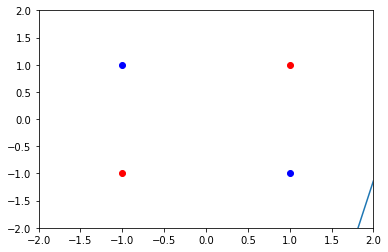

Bobot: [0.00494418 0.06226602 0.1278847 ]


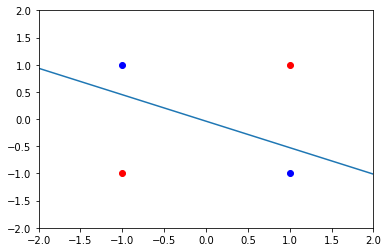


Epoch 9
Bobot: [-0.11456531 -0.05724347  0.00837521]


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [11]:
train = (1, 1), (1, -1), (-1, 1), (-1, -1)
target = -1, 1, 1, -1
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)

### Playground


Epoch 1
Bobot: [-0.03846057  0.72271096  0.42982994]


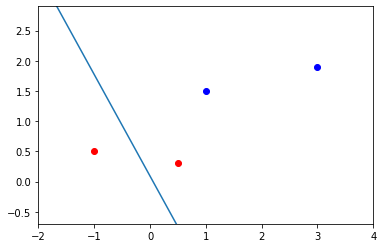

Bobot: [-0.18364495  0.65011876  0.38627462]


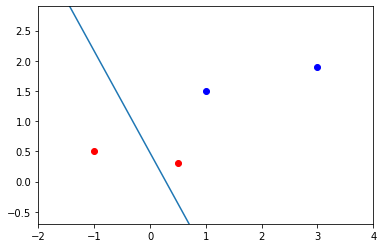

Bobot: [-0.18823353  0.64553019  0.37939176]


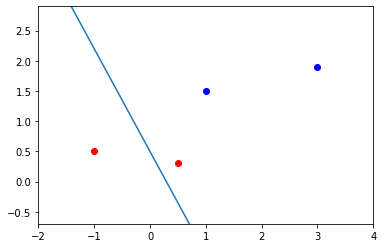

Bobot: [-0.33515367  0.20476977  0.1002435 ]


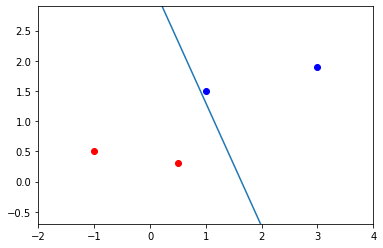


Epoch 2
Bobot: [-0.3861735   0.2557896   0.07473358]


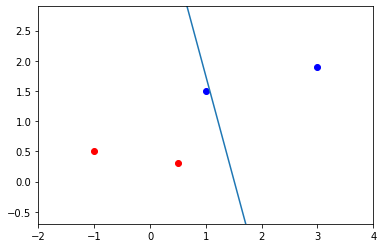

Bobot: [-0.46258764  0.21758254  0.05180934]


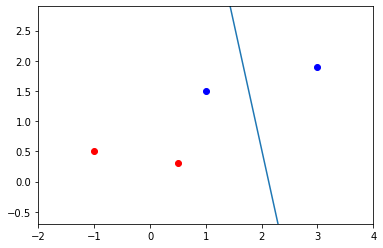

Bobot: [-0.34585853  0.33431164  0.22690301]


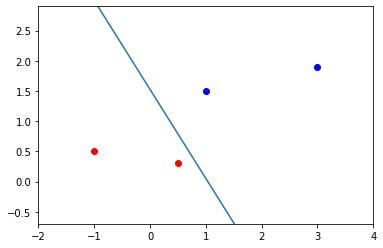

Bobot: [-0.35467774  0.30785401  0.2101465 ]


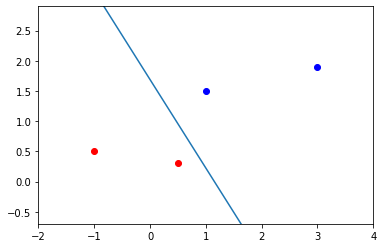


Epoch 3
Bobot: [-0.39893189  0.35210816  0.18801943]


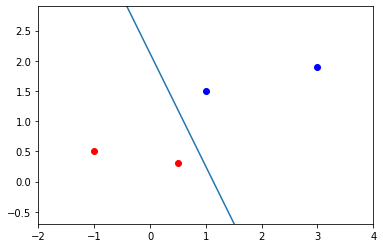

Bobot: [-0.48228469  0.31043176  0.16301359]


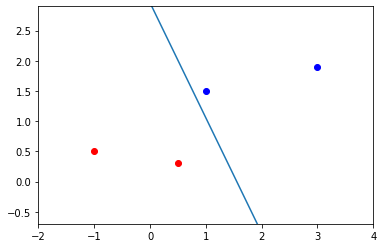

Bobot: [-0.38955144  0.40316501  0.30211347]


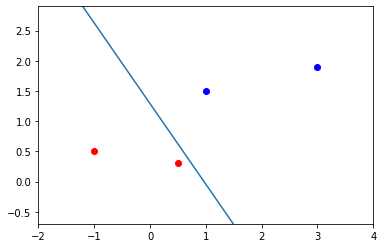

Bobot: [-0.42894736  0.28497725  0.22726122]


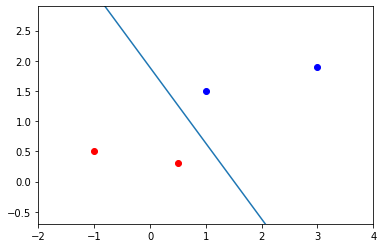


Epoch 4
Bobot: [-0.46891796  0.32494785  0.20727592]


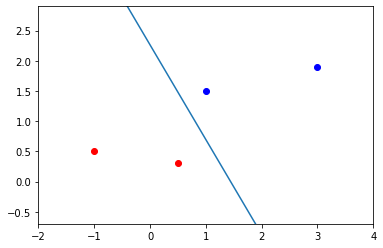

Bobot: [-0.54449183  0.28716092  0.18460376]


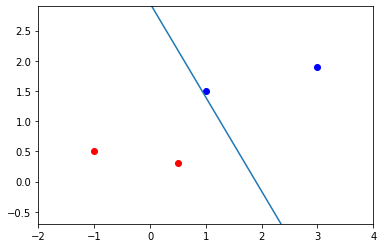

Bobot: [-0.4464493   0.38520344  0.33166755]


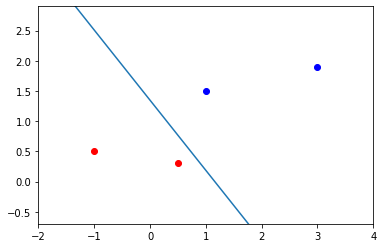

Bobot: [-0.48038224  0.28340463  0.26719497]


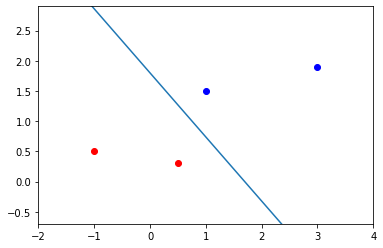


Epoch 5
Bobot: [-0.5173633   0.32038569  0.24870444]


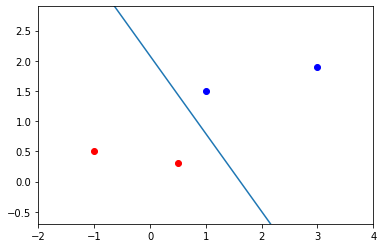

Bobot: [-0.58910739  0.28451365  0.22718121]


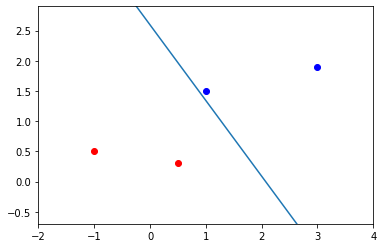

Bobot: [-0.4927252   0.38089584  0.3717545 ]


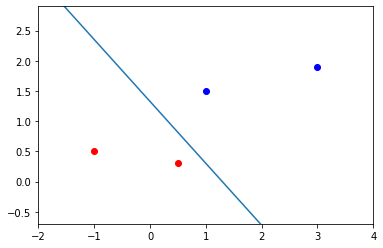

Bobot: [-0.52835479  0.27400708  0.30405828]


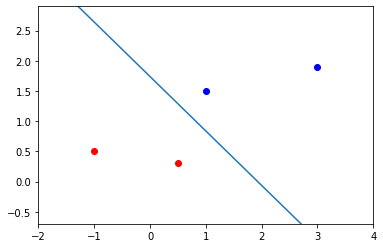


Epoch 6
Bobot: [-0.56332151  0.30897381  0.28657492]


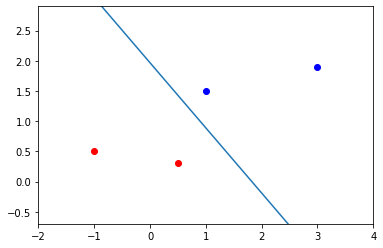

Bobot: [-0.6310353   0.27511691  0.26626078]


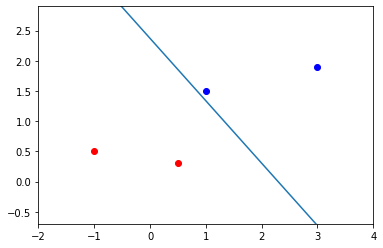

Bobot: [-0.53538258  0.37076963  0.40973987]


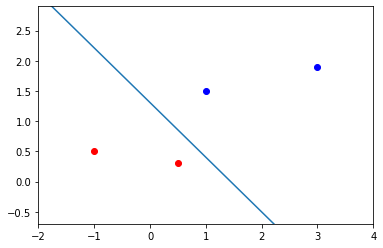

Bobot: [-0.57092579  0.26414001  0.34220777]


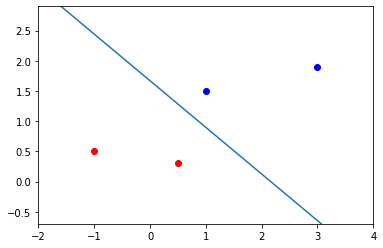


Epoch 7
Bobot: [-0.60452959  0.29774382  0.32540587]


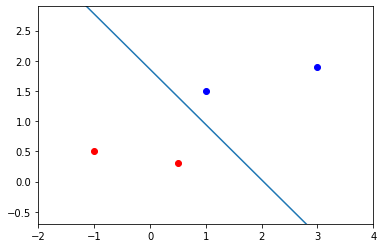

Bobot: [-0.668726    0.26564562  0.30614695]


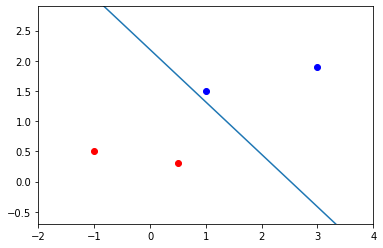

Bobot: [-0.57434001  0.36003161  0.44772594]


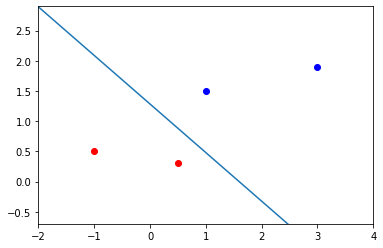

Bobot: [-0.60998342  0.25310138  0.38000346]


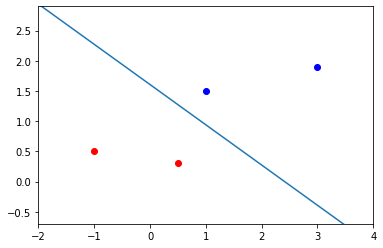


Epoch 8
Bobot: [-0.64267511  0.28579307  0.36365761]


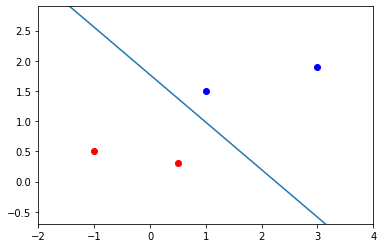

Bobot: [-0.70360698  0.25532713  0.34537805]


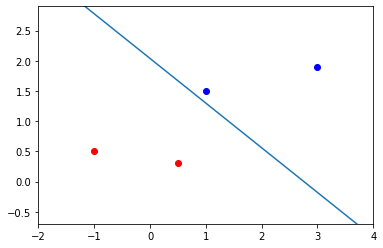

Bobot: [-0.61058571  0.34834841  0.48490997]


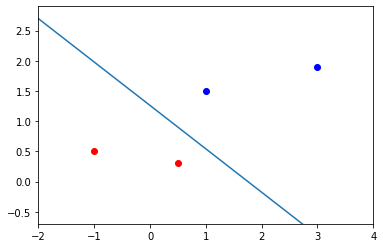

Bobot: [-0.64616455  0.24161187  0.41731016]


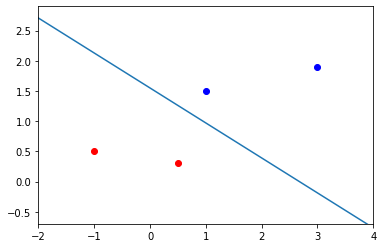


Epoch 9
Bobot: [-0.67825242  0.27369974  0.40126622]


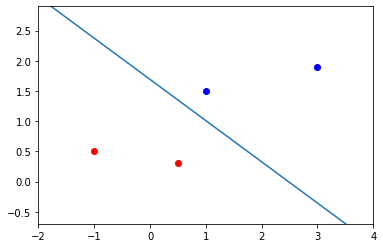

Bobot: [-0.73615015  0.24475087  0.3838969 ]


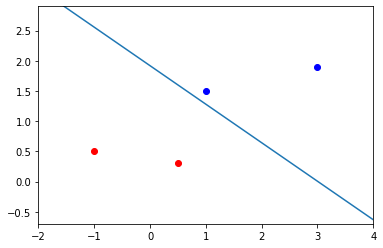

Bobot: [-0.64459476  0.33630626  0.52122999]


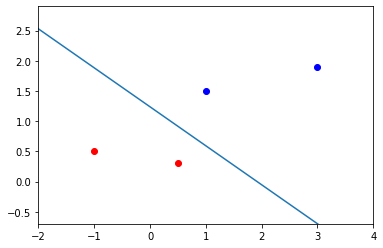

Bobot: [-0.68006086  0.22990796  0.4538444 ]


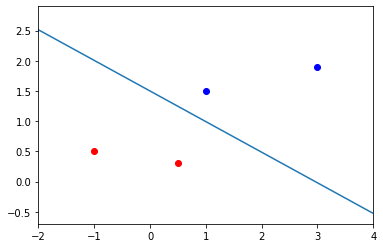


Epoch 10
Bobot: [-0.7117562   0.2616033   0.43799673]


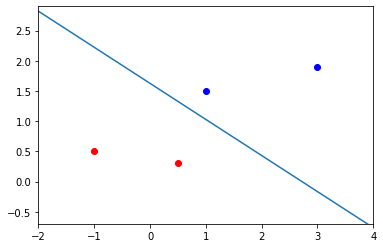

Bobot: [-0.76680064  0.23408107  0.4214834 ]


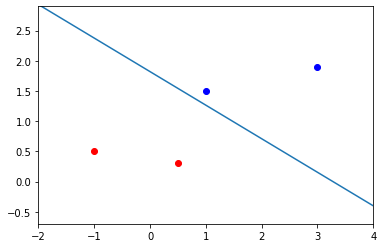

Bobot: [-0.6767512   0.32413052  0.55655757]


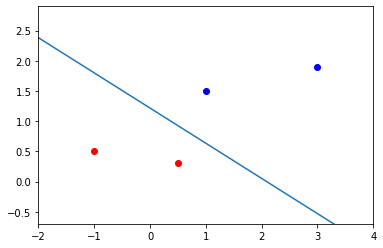

Bobot: [-0.71206117  0.2182006   0.48946862]


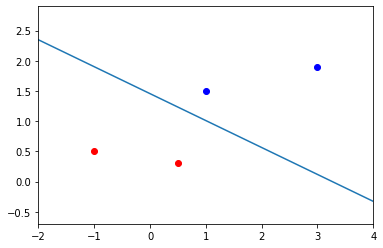


Epoch 11
Bobot: [-0.74350842  0.24964785  0.47374499]


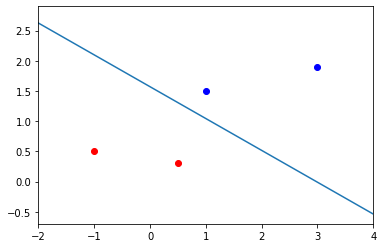

Bobot: [-0.79585232  0.2234759   0.45804182]


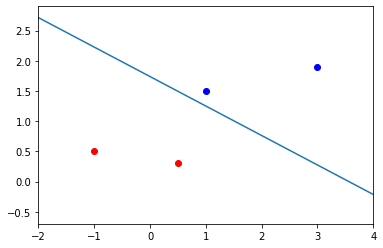

Bobot: [-0.70732096  0.31200727  0.59083887]


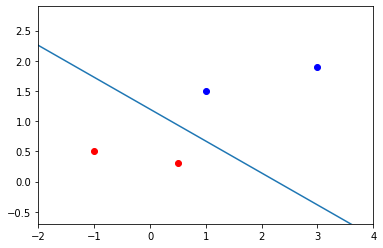

Bobot: [-0.74245043  0.20661886  0.52409288]


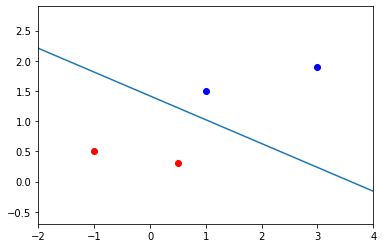


Epoch 12
Bobot: [-0.77374814  0.23791657  0.50844402]


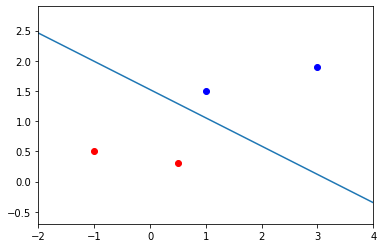

Bobot: [-0.82352248  0.2130294   0.49351172]


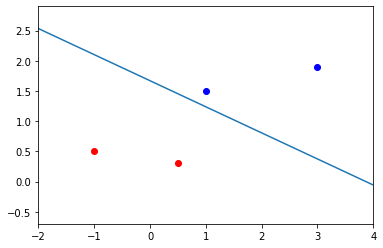

Bobot: [-0.73649993  0.30005195  0.62404554]


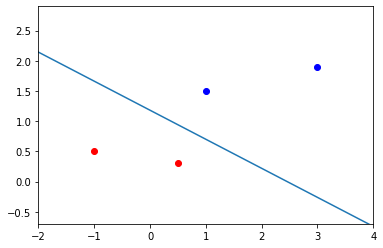

Bobot: [-0.77143417  0.19524921  0.55767047]


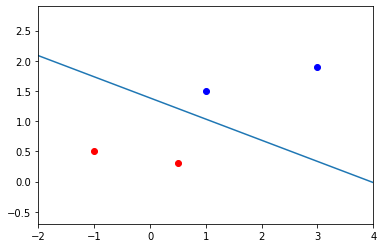


Epoch 13
Bobot: [-0.80264936  0.2264644   0.54206288]


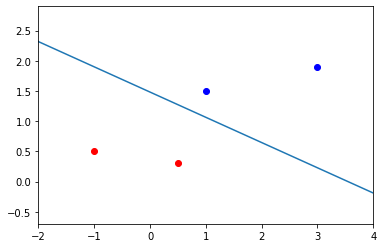

Bobot: [-0.84996953  0.20280431  0.52786683]


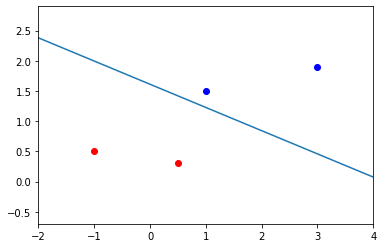

Bobot: [-0.76443303  0.28834081  0.65617158]


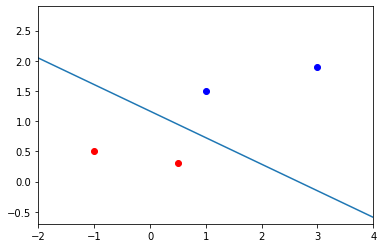

Bobot: [-0.79916457  0.18414619  0.59018165]


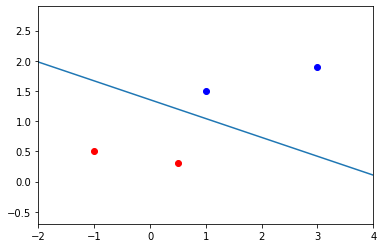


Epoch 14
Bobot: [-0.83034258  0.2153242   0.57459265]


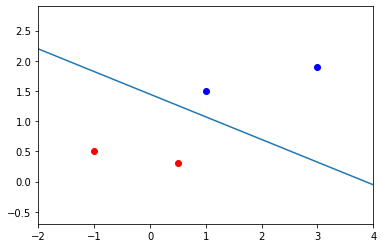

Bobot: [-0.87531231  0.19283933  0.56110173]


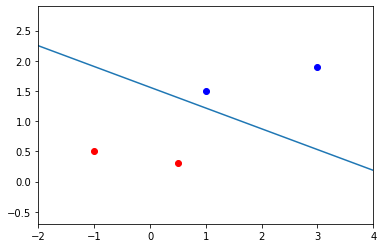

Bobot: [-0.79123027  0.27692137  0.68722479]


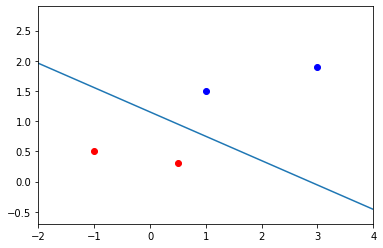

Bobot: [-0.82575637  0.17334309  0.62162521]


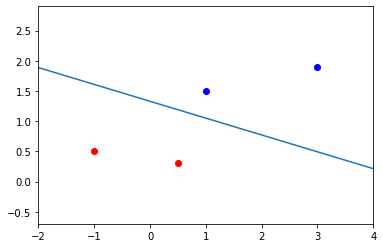


Epoch 15
Bobot: [-0.85692768  0.20451441  0.60603955]


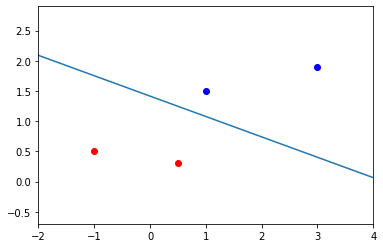

Bobot: [-0.89964182  0.18315734  0.59322531]


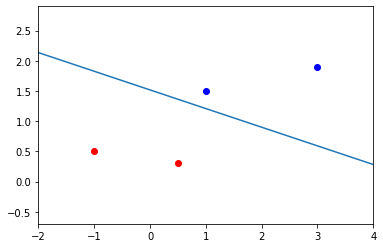

Bobot: [-0.81697717  0.26582199  0.71722229]


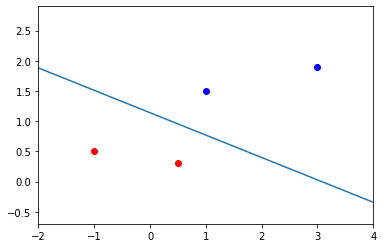

Bobot: [-0.85129828  0.16285864  0.65201217]


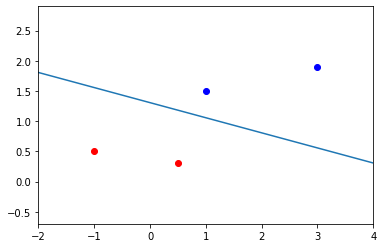


Epoch 16
Bobot: [-0.8824832   0.19404356  0.63641971]


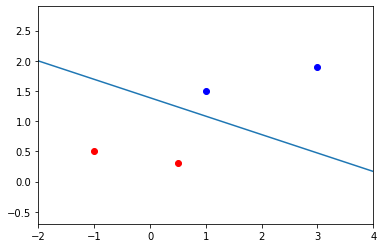

Bobot: [-0.92302965  0.17377034  0.62425578]


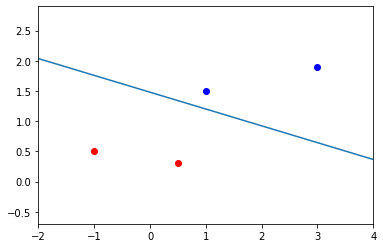

Bobot: [-0.84174208  0.2550579   0.74618712]


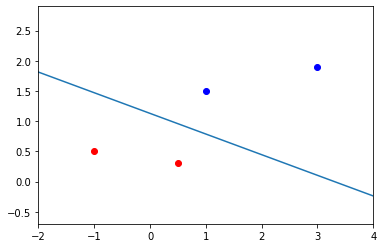

Bobot: [-0.8758608   0.15270175  0.68136156]


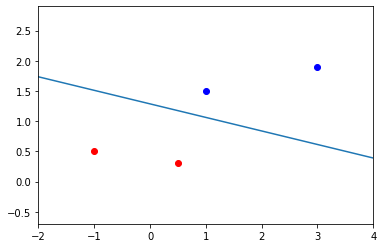


Epoch 17
Bobot: [-0.90707262  0.18391358  0.66575565]


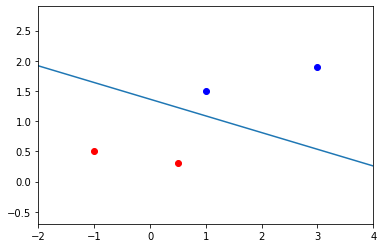

Bobot: [-0.94553371  0.16468303  0.65421733]


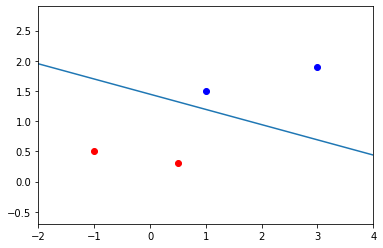

Bobot: [-0.86558124  0.2446355   0.77414603]


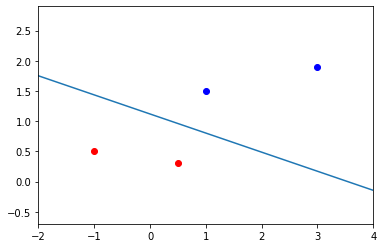

Bobot: [-0.89950151  0.14287468  0.70969751]


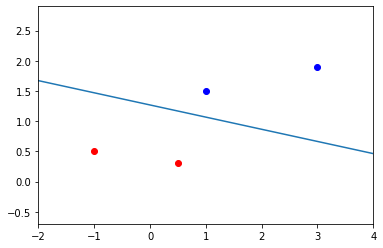


Epoch 18
Bobot: [-0.93074877  0.17412194  0.69407388]


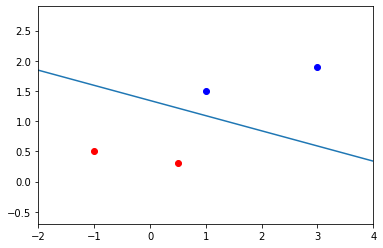

Bobot: [-0.9672022   0.15589522  0.68313785]


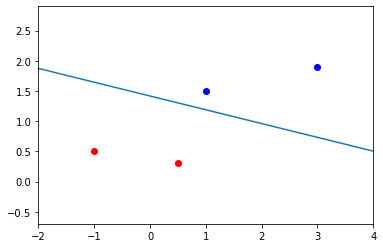

Bobot: [-0.88854218  0.23455524  0.80112788]


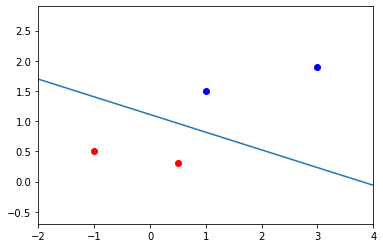

Bobot: [-0.92226884  0.13337529  0.73704724]


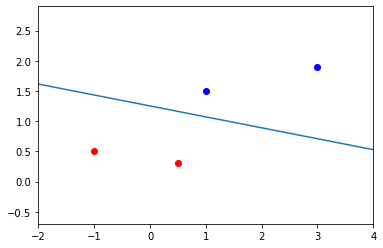


Epoch 19
Bobot: [-0.95355679  0.16466324  0.72140327]


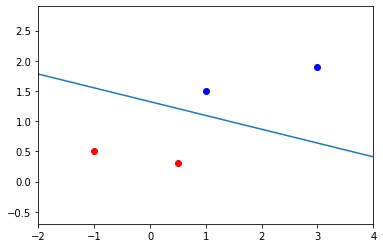

Bobot: [-0.98807637  0.14740345  0.71104739]


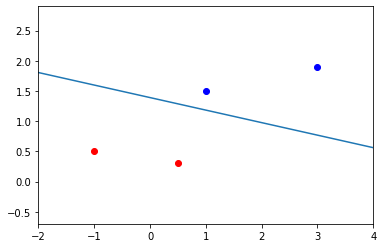

Bobot: [-0.91066618  0.22481363  0.82716267]


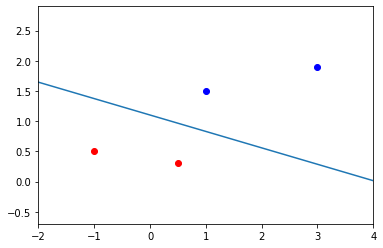

Bobot: [-0.94420456  0.1241985   0.76343975]


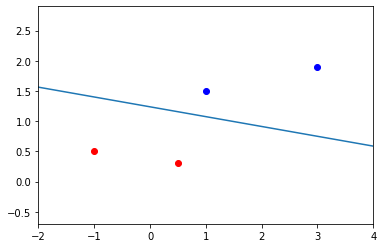


Epoch 20
Bobot: [-0.97553624  0.15553018  0.74777391]


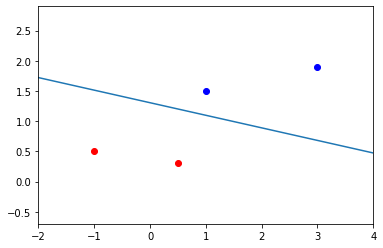

Bobot: [-1.00819235  0.13920213  0.73797708]


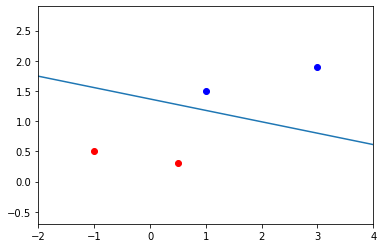

Bobot: [-0.93198989  0.21540459  0.85228077]


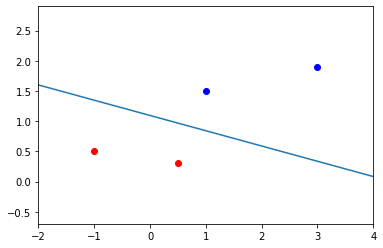

Bobot: [-0.96534562  0.11533739  0.78890488]


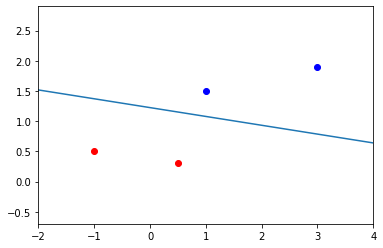


Epoch 21
Bobot: [-0.99672256  0.14671433  0.7732164 ]


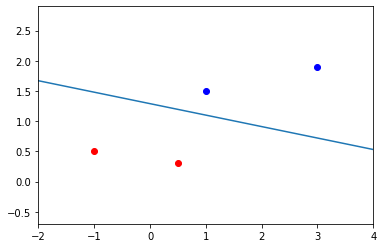

Bobot: [-1.02758252  0.13128435  0.76395842]


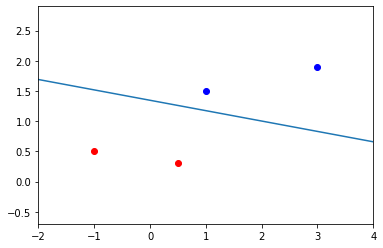

Bobot: [-0.95254646  0.20632041  0.8765125 ]


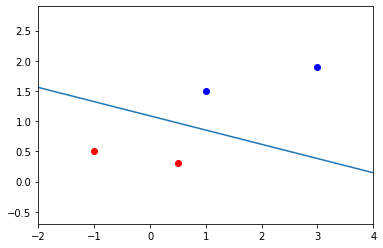

Bobot: [-0.98572531  0.10678385  0.81347268]


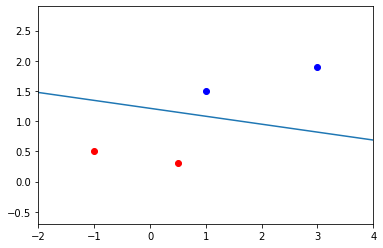


Epoch 22
Bobot: [-1.01714803  0.13820657  0.79776132]


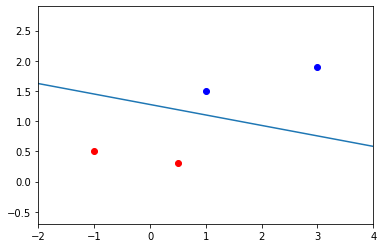

Bobot: [-1.0462764   0.12364239  0.78902281]


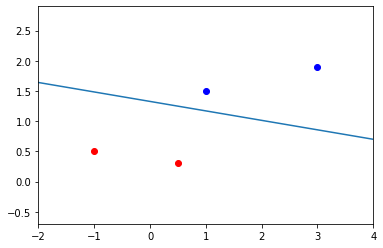

Bobot: [-0.97236642  0.19755237  0.89988778]


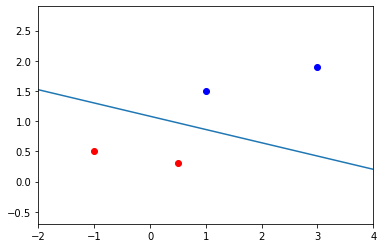

Bobot: [-1.00537416  0.09852913  0.83717306]


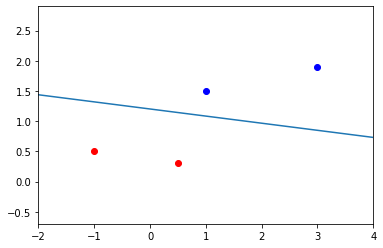


Epoch 23
Bobot: [-1.03684249  0.12999745  0.8214389 ]


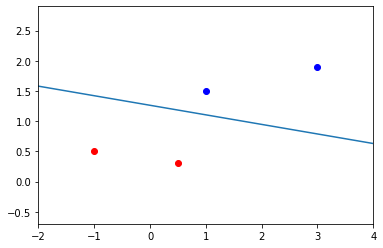

Bobot: [-1.06430128  0.11626805  0.81320126]


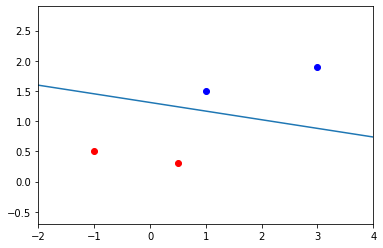

Bobot: [-0.99147815  0.18909119  0.92243596]


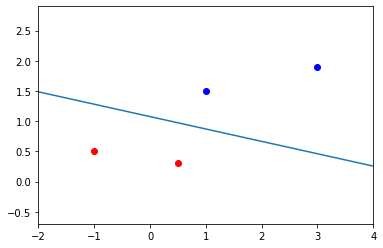

Bobot: [-1.02432052  0.09056406  0.86003545]


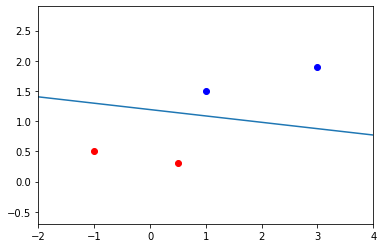


Epoch 24
Bobot: [-1.05583383  0.12207738  0.84427879]


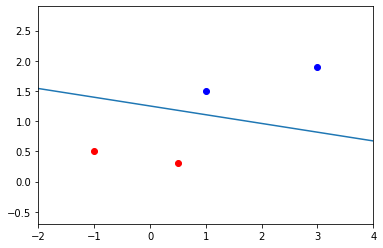

Bobot: [-1.08168268  0.10915295  0.83652414]


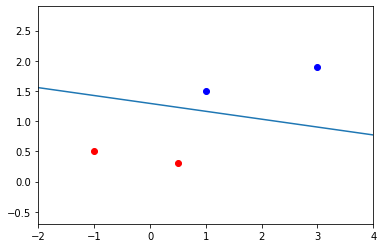

Bobot: [-1.00990833  0.18092731  0.94418567]


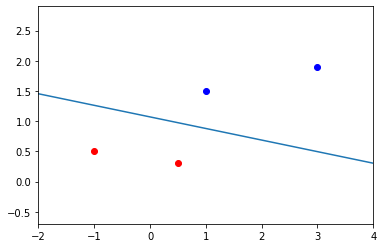

Bobot: [-1.04259097  0.0828794   0.88208866]


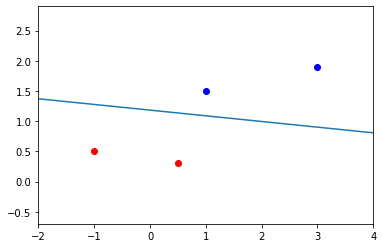


Epoch 25
Bobot: [-1.07414836  0.1144368   0.86630996]


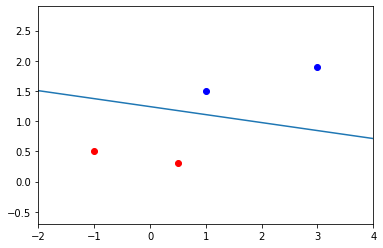

Bobot: [-1.09844467  0.10228864  0.85902107]


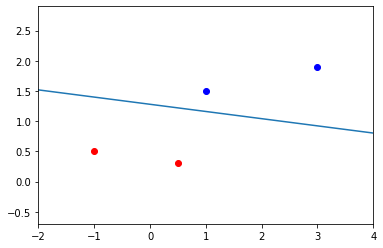

Bobot: [-1.02768222  0.17305109  0.96516473]


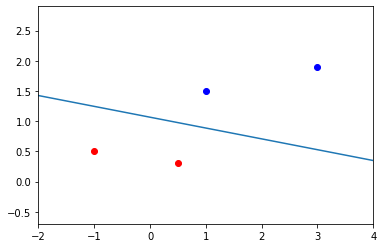

Bobot: [-1.06021063  0.07546588  0.90336077]


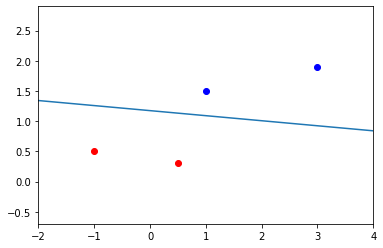


Epoch 26
Bobot: [-1.09181102  0.10706627  0.88756057]


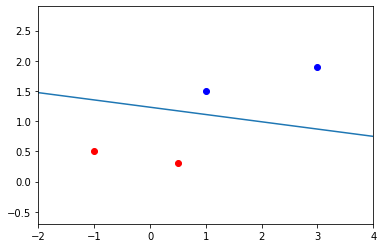

Bobot: [-1.11461004  0.09566675  0.88072087]


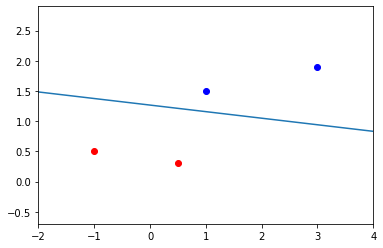

Bobot: [-1.04482384  0.16545295  0.98540016]


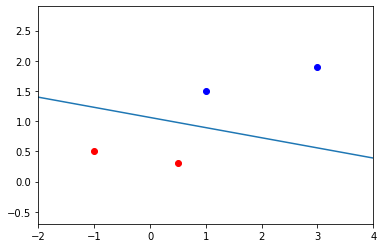

Bobot: [-1.07720338  0.06831435  0.92387905]


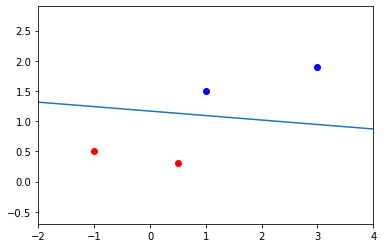


Epoch 27
Bobot: [-1.10884556  0.09995653  0.90805796]


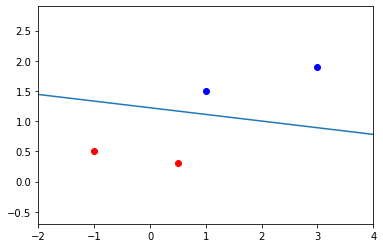

Bobot: [-1.13020057  0.08927903  0.90165146]


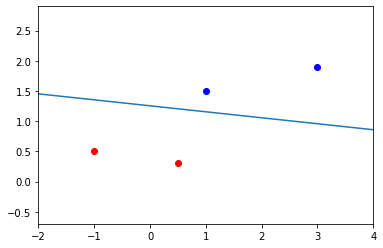

Bobot: [-1.06135613  0.15812346  1.00491811]


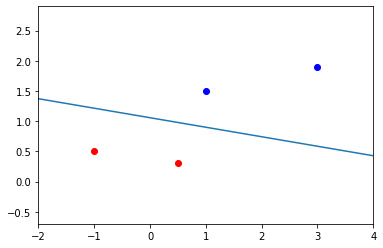

Bobot: [-1.093592    0.06141586  0.94366996]


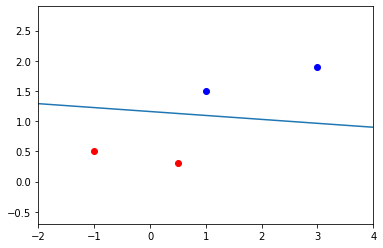


Epoch 28
Bobot: [-1.12527471  0.09309857  0.92782861]


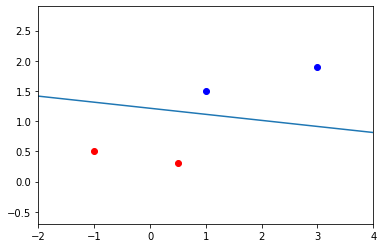

Bobot: [-1.14523703  0.08311742  0.92183991]


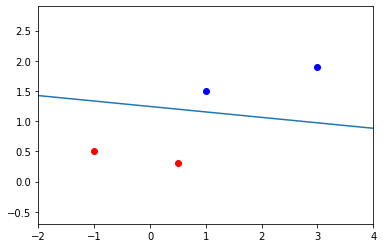

Bobot: [-1.07730105  0.15105339  1.02374388]


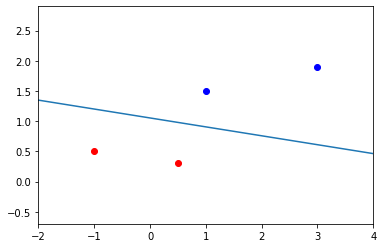

Bobot: [-1.1093983   0.05476165  0.9627591 ]


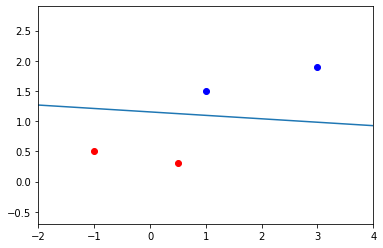


Epoch 29
Bobot: [-1.14112026  0.08648361  0.94689812]


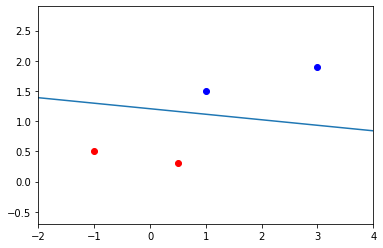

Bobot: [-1.15973936  0.07717406  0.94131239]


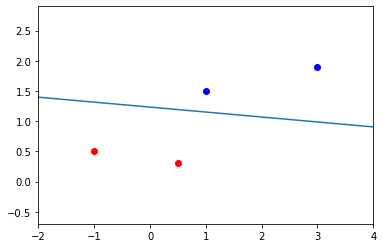

Bobot: [-1.09267969  0.14423373  1.0419019 ]


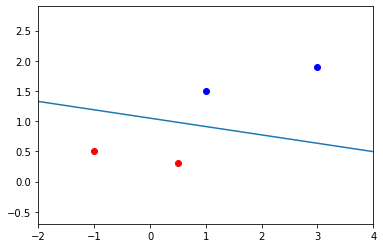

Bobot: [-1.1246432   0.0483432   0.98117123]


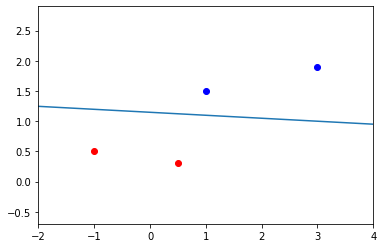


Epoch 30
Bobot: [-1.15640312  0.08010312  0.96529127]


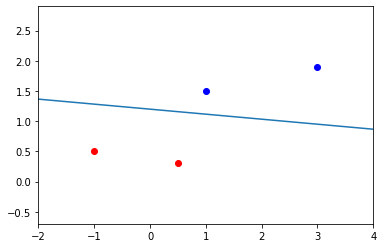

Bobot: [-1.1737267   0.07144133  0.96009419]


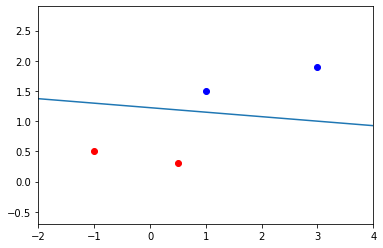

Bobot: [-1.10751229  0.13765574  1.05941581]


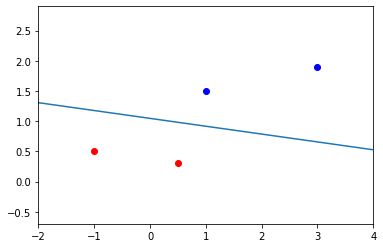

Bobot: [-1.13934679  0.04215225  0.99893027]


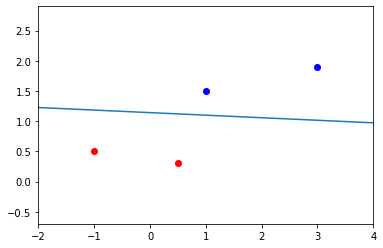

Output: [-1, -1, 1, 1]
Epoch: 30
Target: (-1, -1, 1, 1)
Accuracy: 1.0


In [12]:
train = (-1, .5), (.5, .3), (1, 1.5), (3, 1.9)
target = (-1, -1, 1, 1)
w, epoch = adaline_fit(train, target, verbose=True, draw=True)
output = adaline_predict(train, w)
accuracy = calc_accuracy(output, target)

print('Output:', output)
print('Epoch:', epoch)
print('Target:', target)
print('Accuracy:', accuracy)